In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [20]:
train_values = pd.read_csv("train_values.csv")
train_labels = pd.read_csv("train_labels.csv")

In [21]:
train_values.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,3,1,1,1,70.0,3,18,37,246,...,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,1,3,1,178.0,3,369,52,299,...,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,2,1,3,1,163.0,3,16,10,306,...,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,3,1,1,1,1,155.0,1,305,47,180,...,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,4,1,1,1,1,305.0,3,24,37,20,...,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False


In [22]:
train_labels.head(1)

,row_id,accepted
0,0,1


In [23]:
train_values.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,500000.000000,460052.000000,477535.000000,477534.000000,477560.000000,477486.000000,477435.000000,477470.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,181.606972,23.726924,144.542062,...,4.786586,1.462374,102.389521,5416.833956,31.617310,69235.603298,91.832624,1427.718282,1886.147065,3720.121344
std,144337.711634,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,138.464169,15.982768,100.243612,...,1.024927,0.677685,153.534496,2728.144999,26.333938,14810.058791,14.210924,737.559511,914.123744,1838.313175
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,1.000000,14.000000,0.534000,17858.000000,3.981000,4.000000,1.000000,0.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,...,5.000000,1.000000,47.000000,3744.000000,10.700000,59731.000000,88.067250,944.000000,1301.000000,2442.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,...,5.000000,1.000000,74.000000,4975.000000,22.901000,67526.000000,100.000000,1327.000000,1753.000000,3731.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,...,5.000000,2.000000,117.000000,6467.000000,46.020000,75351.000000,100.000000,1780.000000,2309.000000,5436.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,...,7.000000,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000


In [24]:
train_values['accepted'] = train_labels['accepted']

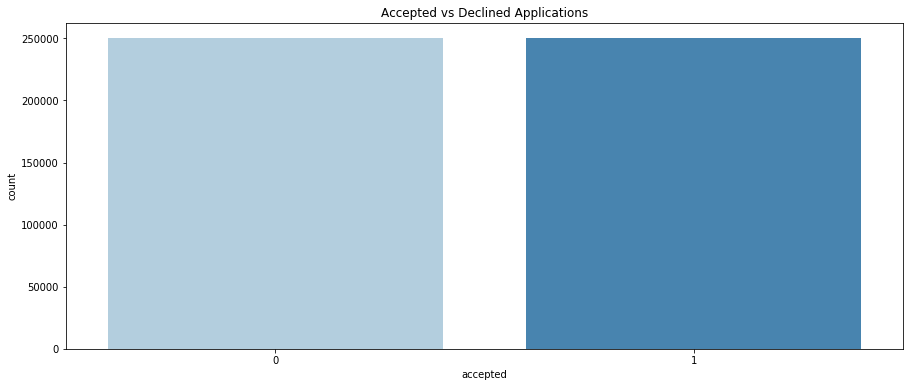

In [25]:
fig, ax = plt.subplots(figsize = (15,6))
ax.set_title("Accepted vs Declined Applications")
sns.countplot(x="accepted", data=train_values, palette="Blues", ax=ax);

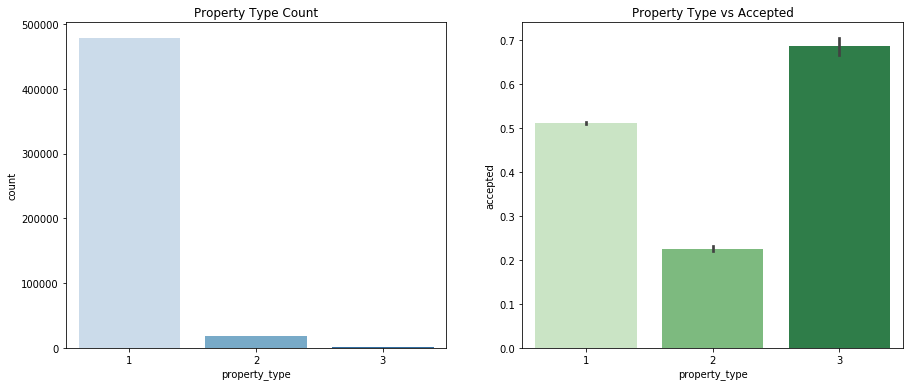

In [26]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].set_title("Property Type Count")
ax[1].set_title("Property Type vs Accepted")
sns.countplot(x="property_type", data=train_values, palette="Blues", ax = ax[0]);
sns.barplot(x='property_type', y='accepted', data=train_values, palette="Greens", ax=ax[1]);

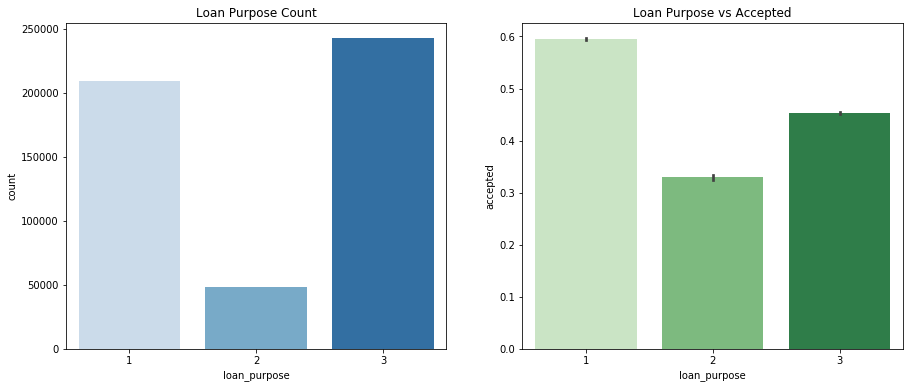

In [27]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].set_title("Loan Purpose Count")
ax[1].set_title("Loan Purpose vs Accepted")
sns.countplot(x="loan_purpose", data=train_values, palette="Blues", ax = ax[0]);
sns.barplot(x='loan_purpose', y='accepted', data=train_values, palette="Greens", ax=ax[1]);

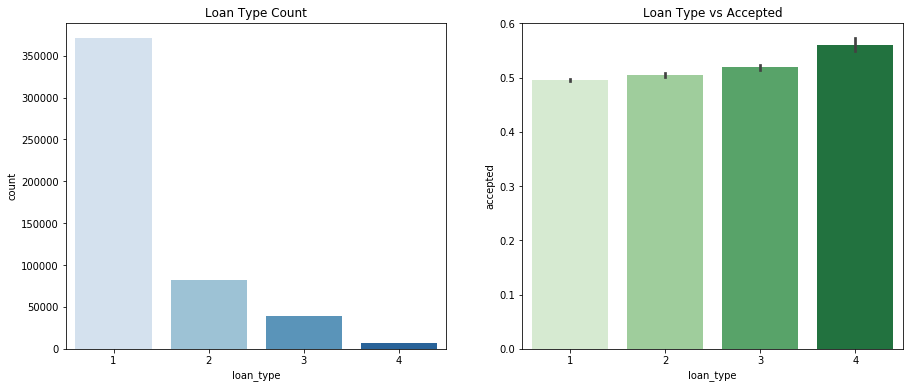

In [28]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].set_title("Loan Type Count")
ax[1].set_title("Loan Type vs Accepted")
sns.countplot(x="loan_type", data=train_values, palette="Blues", ax = ax[0]);
sns.barplot(x='loan_type', y='accepted', data=train_values, palette="Greens", ax=ax[1]);

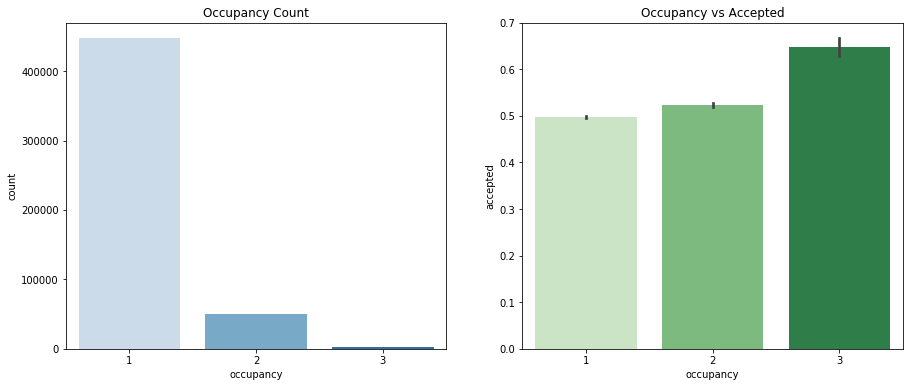

In [29]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].set_title("Occupancy Count")
ax[1].set_title("Occupancy vs Accepted")
sns.countplot(x="occupancy", data=train_values, palette="Blues", ax = ax[0]);
sns.barplot(x='occupancy', y='accepted', data=train_values, palette="Greens", ax=ax[1]);

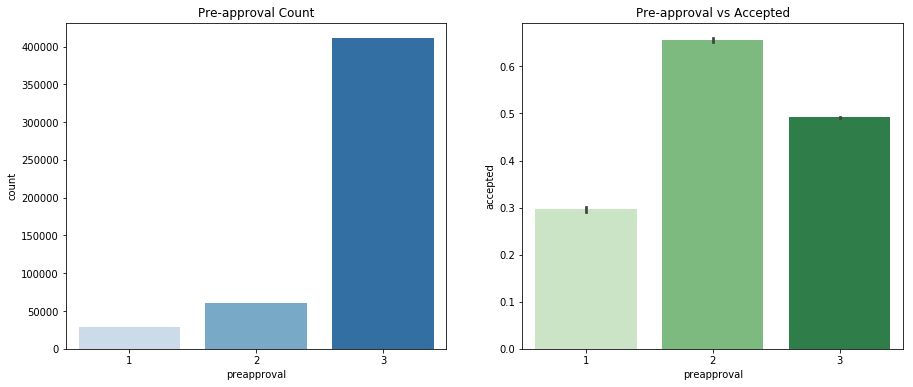

In [30]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].set_title("Pre-approval Count")
ax[1].set_title("Pre-approval vs Accepted")
sns.countplot(x="preapproval", data=train_values, palette="Blues", ax = ax[0]);
sns.barplot(x='preapproval', y='accepted', data=train_values, palette="Greens", ax=ax[1]);

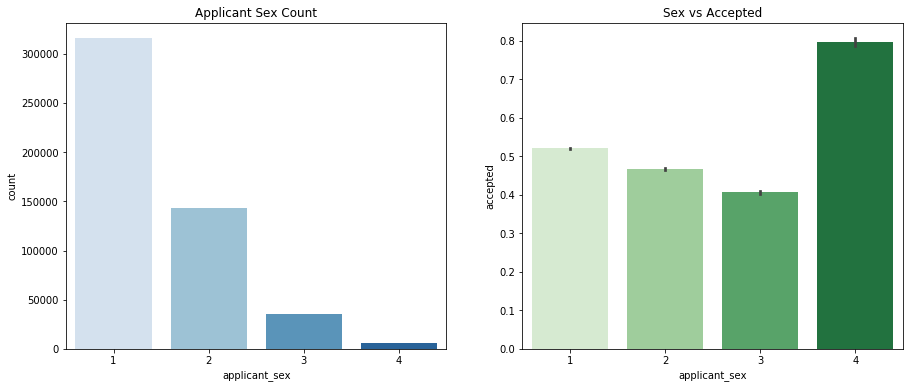

In [31]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].set_title("Applicant Sex Count")
ax[1].set_title("Sex vs Accepted")
sns.countplot(x="applicant_sex", data=train_values, palette="Blues", ax = ax[0]);
sns.barplot(x='applicant_sex', y='accepted', data=train_values, palette="Greens", ax=ax[1]);

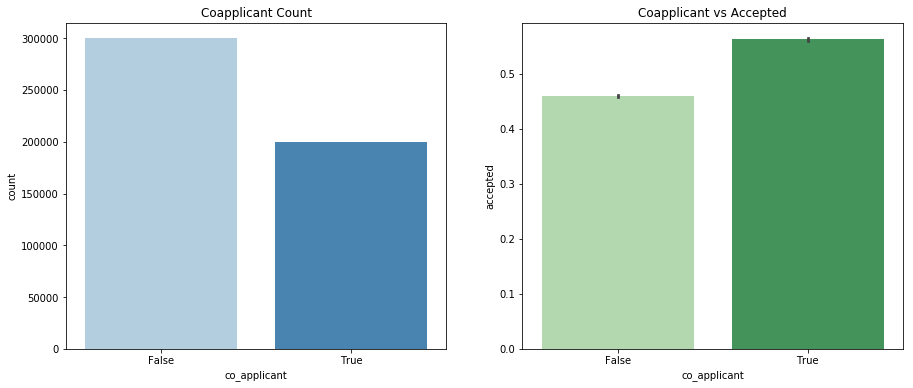

In [32]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].set_title("Coapplicant Count")
ax[1].set_title("Coapplicant vs Accepted")
sns.countplot(x="co_applicant", data=train_values, palette="Blues", ax = ax[0]);
sns.barplot(x='co_applicant', y='accepted', data=train_values, palette="Greens", ax=ax[1]);

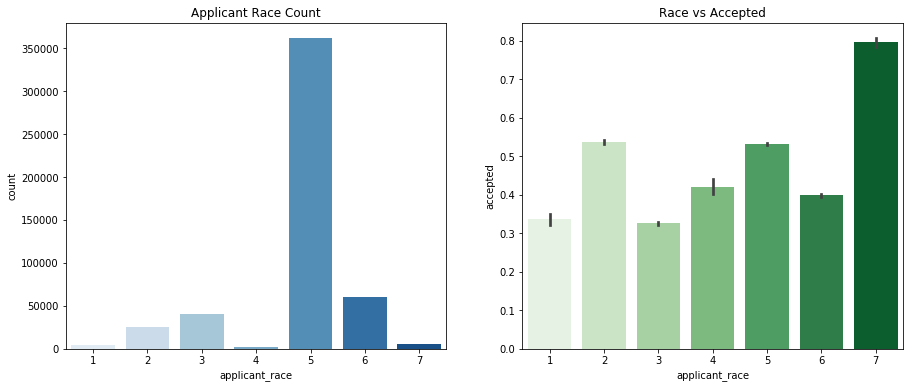

In [33]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].set_title("Applicant Race Count")
ax[1].set_title("Race vs Accepted")
sns.countplot(x="applicant_race", data=train_values, palette="Blues", ax = ax[0]);
sns.barplot(x='applicant_race', y='accepted', data=train_values, palette="Greens", ax=ax[1]);

In [34]:
train_values.applicant_income.fillna(train_values.applicant_income.mode()[0], inplace=True)

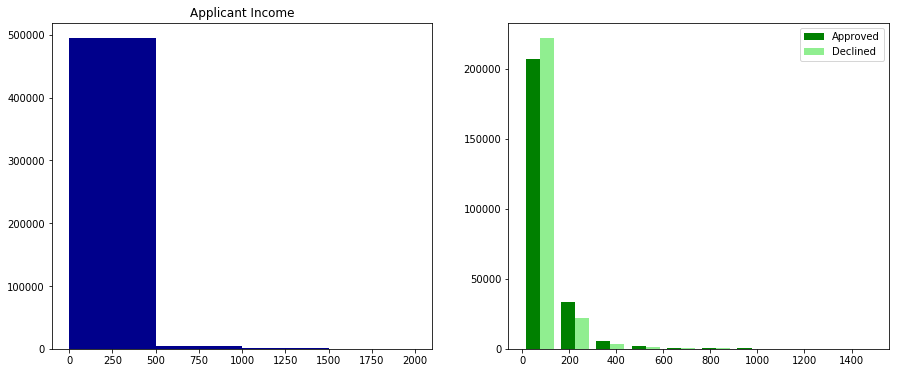

In [35]:
fx, axes = plt.subplots(1,2,figsize=(15,6))
train_values.applicant_income.hist(grid=False, bins=4, range=(0,2000), ax=axes[0], color="DarkBlue").set_title("Applicant Income")

approved = train_values[train_values.accepted == 1].applicant_income
declined = train_values[train_values.accepted == 0].applicant_income

axes[1].hist([approved, declined], bins=10, range=(0, 1500), label=['Approved', 'Declined'], color=['Green', 'lightgreen'])
axes[1].legend()
plt.show()

AttributeError: 'tuple' object has no attribute 'set_title'

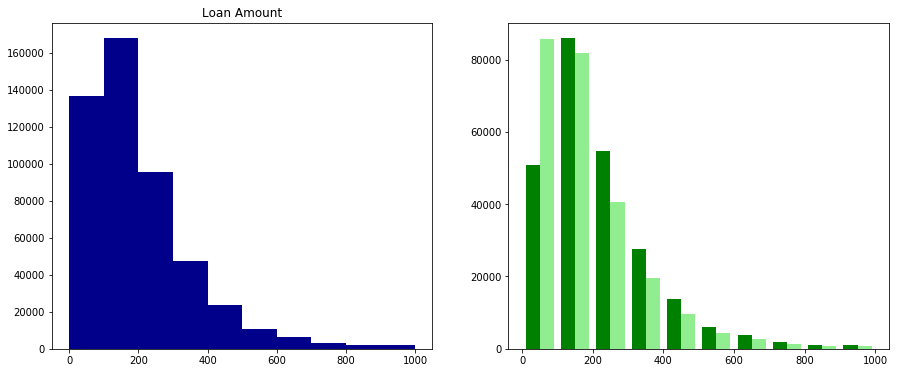

In [36]:
fx, axes = plt.subplots(1,2,figsize=(15,6))
train_values.loan_amount.hist(grid=False, bins=10, range=(0,1000), ax=axes[0], color="DarkBlue").set_title("Loan Amount")

approved = train_values[train_values.accepted == 1].loan_amount
declined = train_values[train_values.accepted == 0].loan_amount

axes[1].hist([approved, declined], bins=10, range=(0, 1000), label=['Approved', 'Declined'], color=['Green', 'lightgreen']).set_title("Loan Amount vs Accepted")
axes[1].legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].set_title("")
ax[1].set_title("")
sns.barplot(x='co_applicant', y='accepted', data=train_values, palette="Greens", ax=ax[0]);
sns.barplot(x='occupancy', y='accepted', data=train_values, palette="Greens", ax=ax[1]);

In [ ]:
x = train_values[['state_code', 'county_code', 'accepted']]
x = x.loc[x['state_code'] == 48]

In [ ]:
state = train_values[['state_code', 'loan_type', 'accepted']]
y = state.loc[state['state_code'] == 4]
z = state.loc[state['state_code'] == 2]

In [ ]:
sns.lineplot(x='county_code', y='accepted', data=x, palette="Greens");

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].set_title("State 4")
ax[1].set_title("State 2")
sns.barplot(x='loan_type', y='accepted', data=y, palette="Greens", ax=ax[0]);
sns.barplot(x='loan_type', y='accepted', data=z, palette="Greens", ax=ax[1]);

In [ ]:
train_values['income_band'] = train_values['applicant_income'].apply(lambda value: ('low' if value <= 2534 else 'medium') if value <= 7605 else 'high')
train_values['income_band'] = pd.Categorical(train_values['income_band'], categories=['low', 'medium', 'high'])

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].set_title("Income Banding")
ax[1].set_title("Accepted by Income Banding")
sns.countplot(x="income_band", data=train_values, palette="Blues", ax = ax[0]);
sns.barplot(x='income_band', y='accepted', data=train_values, palette="Greens", ax=ax[1]);

In [ ]:
train_values.describe()

In [ ]:
train_values.fillna(train_values.median(), inplace=True)

In [ ]:
train_values['family_income'] = train_values['ffiecmedian_family_income'].apply(lambda value: ('low' if value <= 30000.00 else 'medium') if value <= 90000.00 else 'high')
train_values['family_income'] = pd.Categorical(train_values['family_income'], categories=['low', 'medium', 'high'])

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].set_title("family_income")
ax[1].set_title("Accepted by family_income")
sns.countplot(x="family_income", data=train_values, palette="Blues", ax = ax[0]);
sns.barplot(x='family_income', y='accepted', data=train_values, palette="Greens", ax=ax[1]);

In [ ]:
train_values['population_level'] = train_values['population'].apply(lambda value: ('low' if value <= 2728 else 'medium') if value <= 10000 else 'high')
train_values['population_level'] = pd.Categorical(train_values['population_level'], categories=['low', 'medium', 'high'])

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].set_title("population_level")
ax[1].set_title("Accepted by population_level")
sns.countplot(x="population_level", data=train_values, palette="Blues", ax = ax[0]);
sns.barplot(x='population_level', y='accepted', data=train_values, palette="Greens", ax=ax[1]);

In [ ]:
train_values['family_units'] = train_values['number_of_1_to_4_family_units'].apply(lambda value: ('low' if value <= 1700 else 'medium') if value <= 10000 else 'high')
train_values['family_units'] = pd.Categorical(train_values['family_units'], categories=['low', 'medium', 'high'])

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].set_title("family_units")
ax[1].set_title("Accepted by family_units")
sns.countplot(x="family_units", data=train_values, palette="Blues", ax = ax[0]);
sns.barplot(x='family_units', y='accepted', data=train_values, palette="Greens", ax=ax[1]);

In [ ]:
train_values['owner_occ_units'] = train_values['number_of_owner-occupied_units'].apply(lambda value: ('low' if value <= 1000 else 'medium') if value <= 4500 else 'high')
train_values['owner_occ_units'] = pd.Categorical(train_values['owner_occ_units'], categories=['low', 'medium', 'high'])

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].set_title("owner_occ_units")
ax[1].set_title("Accepted by owner_occ_units")
sns.countplot(x="owner_occ_units", data=train_values, palette="Blues", ax = ax[0]);
sns.barplot(x='owner_occ_units', y='accepted', data=train_values, palette="Greens", ax=ax[1]);

In [ ]:
train_values['income_band'] = train_values['applicant_income'].apply(lambda value: ('low' if value <= 40 else 'medium') if value <= 150 else 'high')
train_values['income_band'] = pd.Categorical(train_values['income_band'], categories=['low', 'medium', 'high'])

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].set_title("income_band")
ax[1].set_title("Accepted by income_band")
sns.countplot(x="income_band", data=train_values, palette="Blues", ax = ax[0]);
sns.barplot(x='income_band', y='accepted', data=train_values, palette="Greens", ax=ax[1]);

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].set_title("lender")
ax[1].set_title("lender")
sns.countplot(x="lender", data=train_values, palette="Blues", ax = ax[0]);
sns.barplot(x='lender', y='accepted', data=train_values, palette="Greens", ax=ax[1]);